In [ ]:
    from google.colab import files
    uploaded = files.upload()

Saving bioactivity_preprocessed_data.csv to bioactivity_preprocessed_data.csv


In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 38.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')

In [ ]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,413.0
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,2.0
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,460.0
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,intermediate,9000.0
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,intermediate,5600.0
...,...,...,...,...
10605,CHEMBL5434858,CCCN1CCCCCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)...,intermediate,6000.0
10606,CHEMBL5412274,CCCN1CCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2c...,intermediate,1850.0
10607,CHEMBL5432126,CCCN1CCOCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c...,inactive,22700.0
10608,CHEMBL5427012,CCCN1CCCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2...,intermediate,3020.0


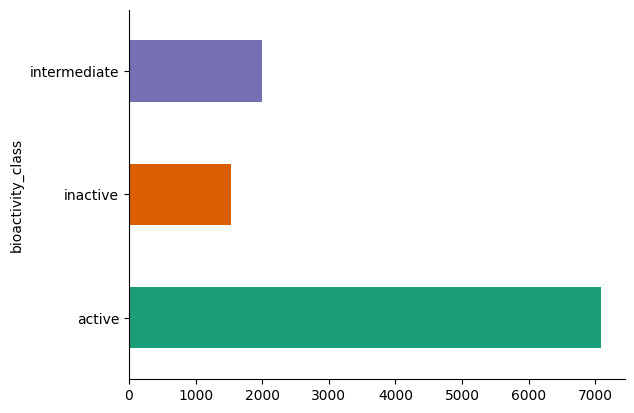

In [ ]:
# @title bioactivity_class

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('bioactivity_class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,999.085,-1.4355,13.0,13.0
1,893.005,-1.7361,12.0,12.0
2,751.988,2.3535,8.0,9.0
3,737.895,1.9626,8.0,8.0
4,828.020,3.5739,8.0,8.0
...,...,...,...,...
10605,601.788,5.3370,3.0,6.0
10606,559.707,4.1667,3.0,6.0
10607,587.761,4.3470,3.0,6.0
10608,571.762,5.1106,3.0,5.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,413.0
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,2.0
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,460.0
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,intermediate,9000.0
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,intermediate,5600.0
...,...,...,...,...
10605,CHEMBL5434858,CCCN1CCCCCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)...,intermediate,6000.0
10606,CHEMBL5412274,CCCN1CCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2c...,intermediate,1850.0
10607,CHEMBL5432126,CCCN1CCOCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c...,inactive,22700.0
10608,CHEMBL5427012,CCCN1CCCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2...,intermediate,3020.0


In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,413.0,999.085,-1.4355,13.0,13.0
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,2.0,893.005,-1.7361,12.0,12.0
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,460.0,751.988,2.3535,8.0,9.0
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,intermediate,9000.0,737.895,1.9626,8.0,8.0
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,intermediate,5600.0,828.020,3.5739,8.0,8.0
...,...,...,...,...,...,...,...,...
10605,CHEMBL5434858,CCCN1CCCCCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)...,intermediate,6000.0,601.788,5.3370,3.0,6.0
10606,CHEMBL5412274,CCCN1CCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2c...,intermediate,1850.0,559.707,4.1667,3.0,6.0
10607,CHEMBL5432126,CCCN1CCOCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c...,inactive,22700.0,587.761,4.3470,3.0,6.0
10608,CHEMBL5427012,CCCN1CCCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2...,intermediate,3020.0,571.762,5.1106,3.0,5.0


In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

In [ ]:
df_combined.standard_value.describe()

,standard_value
count,1.061000e+04
mean,3.411302e+04
std,9.500435e+05
min,2.000000e-04
25%,2.500000e+01
50%,2.000000e+02
75%,2.348500e+03
max,8.600000e+07


In [ ]:
-np.log10( (10**-9)* 100000000 )

np.float64(1.0)

In [ ]:
-np.log10( (10**-9)* 10000000000 )

np.float64(-1.0)

In [ ]:
def norm_value(input_df):
    norm = []

    for i in input_df['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input_df['standard_value_norm'] = norm
    x = input_df.drop('standard_value', axis=1)

    return x

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,999.085,-1.4355,13.0,13.0,413.0
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,893.005,-1.7361,12.0,12.0,2.0
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,751.988,2.3535,8.0,9.0,460.0
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,intermediate,737.895,1.9626,8.0,8.0,9000.0
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,intermediate,828.020,3.5739,8.0,8.0,5600.0
...,...,...,...,...,...,...,...,...
10605,CHEMBL5434858,CCCN1CCCCCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)...,intermediate,601.788,5.3370,3.0,6.0,6000.0
10606,CHEMBL5412274,CCCN1CCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2c...,intermediate,559.707,4.1667,3.0,6.0,1850.0
10607,CHEMBL5432126,CCCN1CCOCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c...,inactive,587.761,4.3470,3.0,6.0,22700.0
10608,CHEMBL5427012,CCCN1CCCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2...,intermediate,571.762,5.1106,3.0,5.0,3020.0


In [ ]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,1.061000e+04
mean,3.411302e+04
std,9.500435e+05
min,2.000000e-04
25%,2.500000e+01
50%,2.000000e+02
75%,2.348500e+03
max,8.600000e+07


In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,999.085,-1.4355,13.0,13.0,6.384050
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,893.005,-1.7361,12.0,12.0,8.698970
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,751.988,2.3535,8.0,9.0,6.337242
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,intermediate,737.895,1.9626,8.0,8.0,5.045757
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,intermediate,828.020,3.5739,8.0,8.0,5.251812
...,...,...,...,...,...,...,...,...
10605,CHEMBL5434858,CCCN1CCCCCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)...,intermediate,601.788,5.3370,3.0,6.0,5.221849
10606,CHEMBL5412274,CCCN1CCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2c...,intermediate,559.707,4.1667,3.0,6.0,5.732828
10607,CHEMBL5432126,CCCN1CCOCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c...,inactive,587.761,4.3470,3.0,6.0,4.643974
10608,CHEMBL5427012,CCCN1CCCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2...,intermediate,571.762,5.1106,3.0,5.0,5.519993


In [ ]:
df_final.pIC50.describe()

,pIC50
count,10610.000000
mean,6.580817
std,1.355163
min,1.065502
25%,5.629210
50%,6.698970
75%,7.602060
max,12.698970


In [ ]:
df_final.to_csv('bs1_bioactivity_data_3class_pIC50.csv')

In [ ]:
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,999.085,-1.4355,13.0,13.0,6.384050
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,893.005,-1.7361,12.0,12.0,8.698970
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,751.988,2.3535,8.0,9.0,6.337242
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,intermediate,737.895,1.9626,8.0,8.0,5.045757
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,intermediate,828.020,3.5739,8.0,8.0,5.251812
...,...,...,...,...,...,...,...,...
10605,CHEMBL5434858,CCCN1CCCCCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)...,intermediate,601.788,5.3370,3.0,6.0,5.221849
10606,CHEMBL5412274,CCCN1CCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2c...,intermediate,559.707,4.1667,3.0,6.0,5.732828
10607,CHEMBL5432126,CCCN1CCOCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c...,inactive,587.761,4.3470,3.0,6.0,4.643974
10608,CHEMBL5427012,CCCN1CCCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2...,intermediate,571.762,5.1106,3.0,5.0,5.519993


In [ ]:
df_2class = df_final[df_final['bioactivity_class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,999.085,-1.4355,13.0,13.0,6.384050
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,893.005,-1.7361,12.0,12.0,8.698970
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,751.988,2.3535,8.0,9.0,6.337242
5,CHEMBL116826,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,inactive,767.987,1.3690,8.0,9.0,4.468521
6,CHEMBL143239,CC(C)[C@H](NC(=O)C[C@H](O)[C@H](Cc1cc(F)cc(F)c...,active,717.722,4.3196,7.0,7.0,7.698970
...,...,...,...,...,...,...,...,...
10596,CHEMBL258939,CC(C)=CC(O)C/C(C)=C/COc1c2ccoc2cc2oc(=O)ccc12,inactive,354.402,4.5815,1.0,5.0,4.584860
10599,CHEMBL5415222,CCCN1CCCCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c...,active,587.761,4.9469,3.0,6.0,6.420216
10600,CHEMBL5399890,COc1cccc(C(C)(C)NC[C@@H](O)[C@@H]2Cc3cccc(c3)O...,active,545.680,3.8245,4.0,6.0,6.040959
10604,CHEMBL5409955,COc1cccc(C(C)(C)NC[C@@H](O)[C@@H]2Cc3cccc(c3)O...,inactive,616.803,4.0985,3.0,7.0,4.280669


In [ ]:
df_2class.to_csv('bs1_05_bioactivity_data_2class_pIC50.csv')

In [ ]:
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,999.085,-1.4355,13.0,13.0,6.384050
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,893.005,-1.7361,12.0,12.0,8.698970
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,751.988,2.3535,8.0,9.0,6.337242
5,CHEMBL116826,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,inactive,767.987,1.3690,8.0,9.0,4.468521
6,CHEMBL143239,CC(C)[C@H](NC(=O)C[C@H](O)[C@H](Cc1cc(F)cc(F)c...,active,717.722,4.3196,7.0,7.0,7.698970
...,...,...,...,...,...,...,...,...
10596,CHEMBL258939,CC(C)=CC(O)C/C(C)=C/COc1c2ccoc2cc2oc(=O)ccc12,inactive,354.402,4.5815,1.0,5.0,4.584860
10599,CHEMBL5415222,CCCN1CCCCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c...,active,587.761,4.9469,3.0,6.0,6.420216
10600,CHEMBL5399890,COc1cccc(C(C)(C)NC[C@@H](O)[C@@H]2Cc3cccc(c3)O...,active,545.680,3.8245,4.0,6.0,6.040959
10604,CHEMBL5409955,COc1cccc(C(C)(C)NC[C@@H](O)[C@@H]2Cc3cccc(c3)O...,inactive,616.803,4.0985,3.0,7.0,4.280669


In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

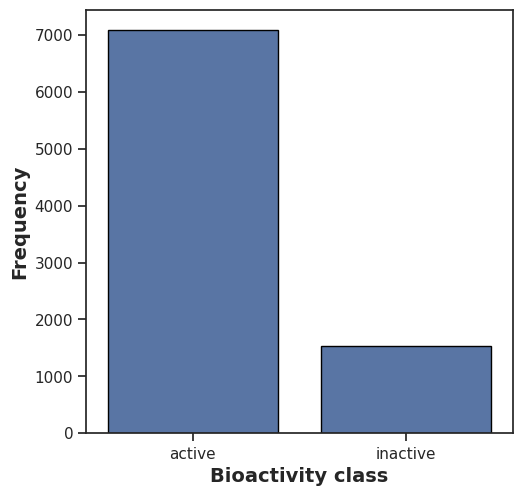

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14,  fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.png')

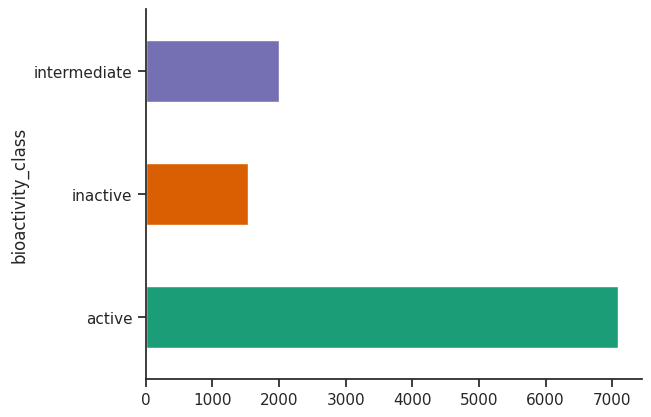

In [ ]:
# @title bioactivity_class

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('bioactivity_class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/tmp/ipython-input-2211154879.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


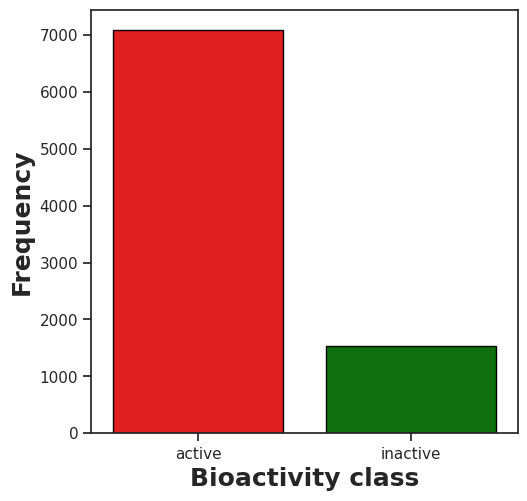

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5.5, 5.5))

# Use a custom color palette (you can add/remove colors as needed)
palette_colors = ["red", "green"]  # blue, orange, green

sns.countplot(
    x='bioactivity_class',
    data=df_2class,
    edgecolor='black',
    palette=palette_colors
)

plt.xlabel('Bioactivity class', fontsize=18, fontweight='bold')
plt.ylabel('Frequency', fontsize=18, fontweight='bold')

plt.savefig('plot_bioactivity_class.png', dpi=300, bbox_inches='tight')
plt.show()


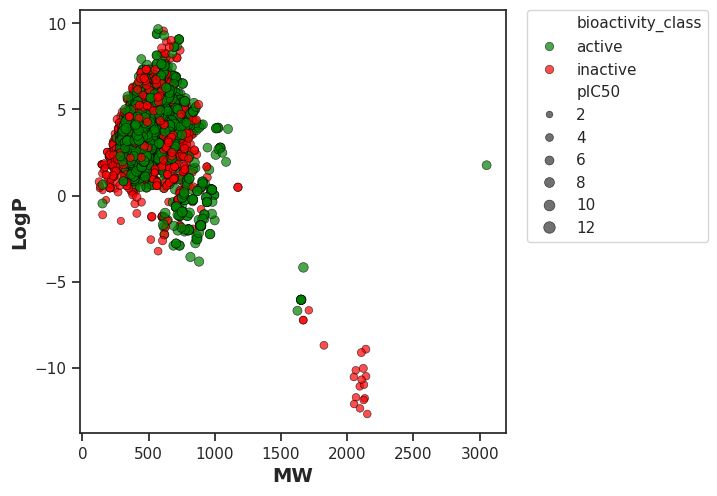

In [ ]:
plt.figure(figsize=(5.5, 5.5))
palette_colors = ["green", "red"]

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7, palette=palette_colors)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.png')
plt.savefig('plot_MW_vs_LogP.pdf')

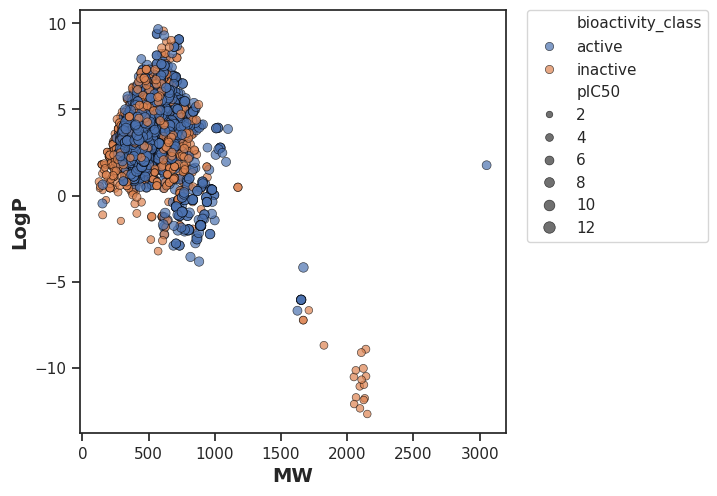

In [ ]:
plt.figure(figsize=(5.5, 5.5))

palette_colors = ["red", "green"]
sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.png')
plt.savefig('plot_MW_vs_LogP.pdf')

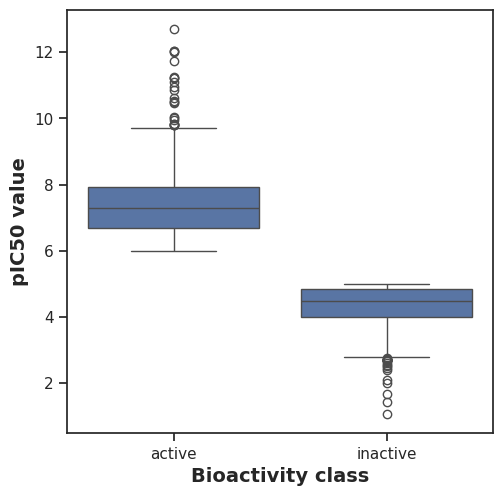

In [ ]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')
plt.savefig('plot_ic50.png')

/tmp/ipython-input-844120874.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class, palette=palette_colors)


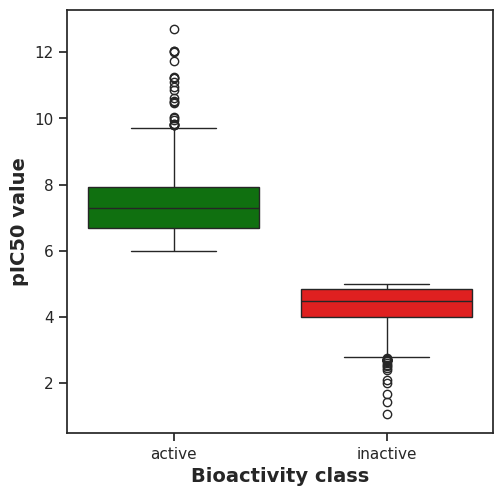

In [ ]:
plt.figure(figsize=(5.5, 5.5))
palette_colors = ["green", "red"]
sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class, palette=palette_colors)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')
plt.savefig('plot_ic50.png')

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df['bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,10826430.0,0.0,0.05,Different distribution (reject H0)


/tmp/ipython-input-787343958.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class, palette=palette_colors)


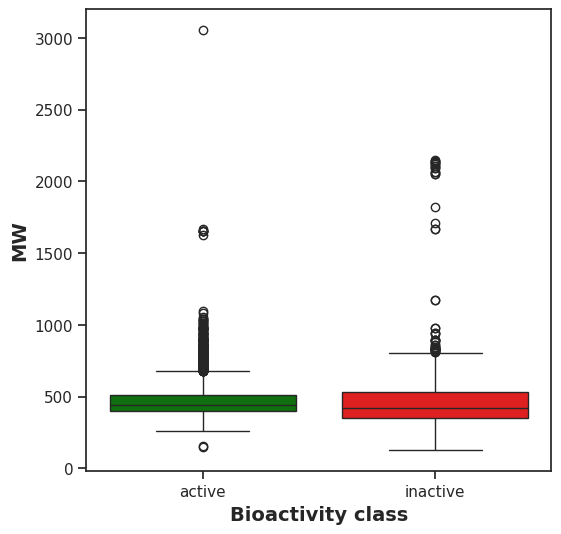

In [ ]:
plt.figure(figsize=(6, 6))
palette_colors = ["green", "red"]
sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class, palette=palette_colors)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')
plt.savefig('plot_MW.png')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,6269246.5,2.784771e-22,0.05,Different distribution (reject H0)


/tmp/ipython-input-3290321802.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class, palette=palette_colors)


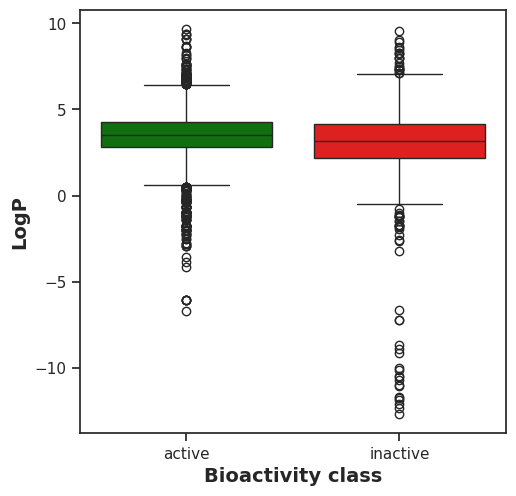

In [ ]:
plt.figure(figsize=(5.5, 5.5))
palette_colors = ["green", "red"]
sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class, palette=palette_colors)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')
plt.savefig('plot_LogP.png')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,6173329.5,6.676582e-18,0.05,Different distribution (reject H0)


/tmp/ipython-input-801375741.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class, palette=palette_colors)


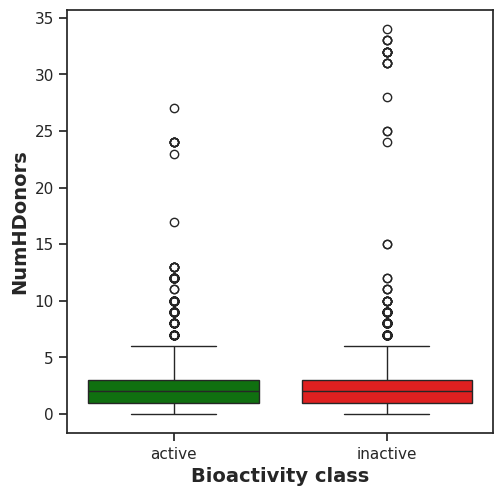

In [ ]:
plt.figure(figsize=(5.5, 5.5))
palette_colors = ["green", "red"]
sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class, palette=palette_colors)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')
plt.savefig('plot_NumHDonors.png')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,5179286.0,0.005454,0.05,Different distribution (reject H0)


/tmp/ipython-input-481118358.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class, palette=palette_colors)


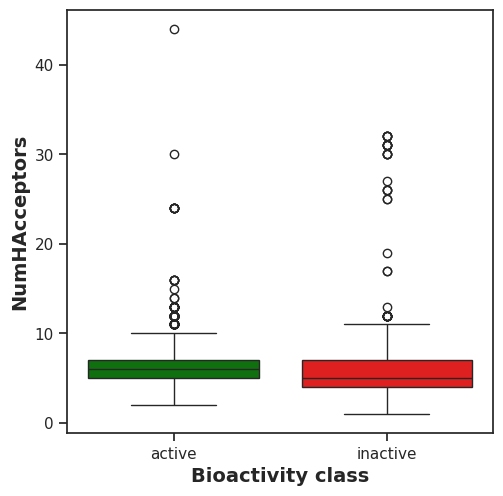

In [ ]:
plt.figure(figsize=(5.5, 5.5))
palette_colors = ["green", "red"]
sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class, palette=palette_colors)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')
plt.savefig('plot_NumHAcceptors.png')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,6330820.0,2.302386e-26,0.05,Different distribution (reject H0)


In [ ]:
! zip -r results.zip . -i *.csv *.pdf *.png

  adding: bioactivity_preprocessed_data (1).csv (deflated 87%)
  adding: plot_LogP.png (deflated 15%)
  adding: plot_MW.png (deflated 18%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 9%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: plot_NumHDonors.png (deflated 15%)
  adding: plot_MW_vs_LogP.pdf (deflated 1%)
  adding: plot_LogP.pdf (deflated 35%)
  adding: plot_ic50.png (deflated 16%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: plot_MW.pdf (deflated 33%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_MW_vs_LogP.png (deflated 2%)
  adding: bioactivity_preprocessed_data.csv (deflated 87%)
  adding: plot_NumHAcceptors.png (deflated 15%)
  adding: bs1_05_bioactivity_data_2class_pIC50.csv (deflated 82%)
  adding: plot_bioactivity_class.png (deflated 21%)
  ad

In [ ]:
from sklearn.model_selection import train_test_split

X = df_final.drop(['molecule_chembl_id', 'canonical_smiles', 'pIC50', 'bioactivity_class'], axis=1)
y = df_final['pIC50']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8488, 4)
Shape of X_test: (2122, 4)
Shape of y_train: (8488,)
Shape of y_test: (2122,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Build the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)